### Loan Prediction Problem Data Analysis

Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset will provide us a taste of working on data sets from insurance companies - what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem where we will try to predict if a loan will get approved or not. The data has 150 rows & 4 columns. 

In [38]:
# Import the needed libraries needed for our data analysis

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [39]:
# Read the dataset using the func read_csv()

df = pd.read_csv("train.csv")

### Condensing the Loan Data

The first step is to look at the structure of the dataset to see if there's any data wrangling we should perform. The below cell will read in the data file and print out the first few rows of the table

In [40]:
# For a quick data exploration, let us look at the first 10 rows. 

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [41]:
# Now, let us look at the summary of numerical values to get a picture of what our dataset looks like

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the summary of the numerical values, here are a few inferences that we can draw just by looking at the output of the describe() function: 

* LoanAmount has (614 – 592) 22 missing values.
* Loan_Amount_Term has (614 – 600) 14 missing values.
* Credit_History has (614 – 564) 50 missing values.
* We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
* The ApplicantIncome distribution seems to be in line with expectations. Same goes for CoapplicantIncome


For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:


In [42]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [43]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [44]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Checking the non-numeric values of our data, we can see that most of our loan applicants are educated working class living dominantly in urban and semiurban properties. Let's see if we can draw more insights from this information later on

### Distribution analysis
Now that we are familiar with basic data characteristics, let us study the distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount. We can start plotting the data using a histogram. A histogram is good to use when you want to discover the underlying frequency distribution (shape) of a set of continuous data set. Let's plot the histogram of ApplicantIncome below



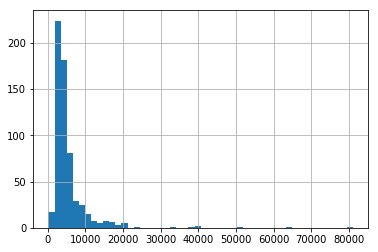

In [45]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions.

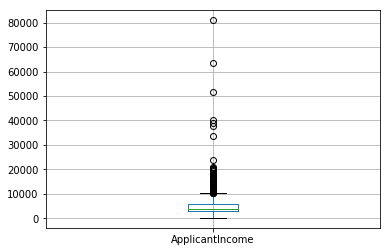

In [46]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

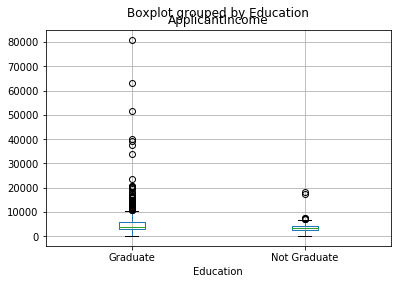

In [47]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount

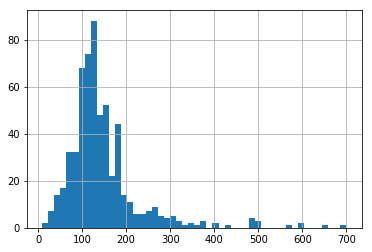

In [48]:
df['LoanAmount'].hist(bins=50)

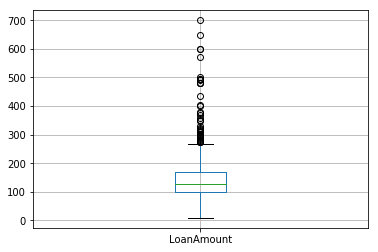

In [49]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demands deeper understanding. We will take this up in coming sections. Now that we understand distributions for ApplicantIncome and LoanIncome, let us understand categorical variables in more details.

In [50]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Here we can see that having a credit history has a positive correlation towards a higher probability of having the loan approved. We will discuss this information in detail in the coming sections.

Text(0.5,1,'Probability of getting loan by credit history')

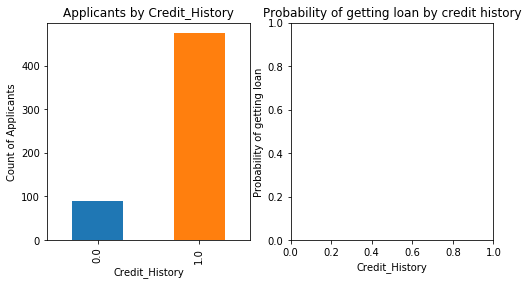

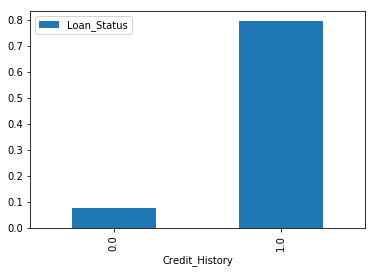

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. We can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart:

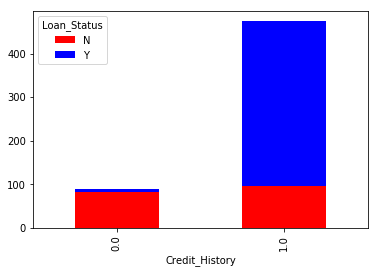

In [52]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

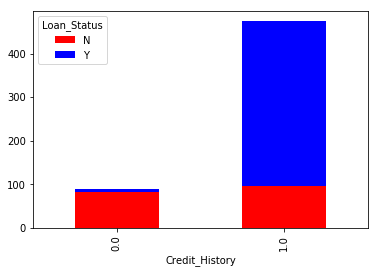

In [31]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [32]:
df.loc[(df["Gender"] == "Male") & (df["Married"] == "Yes") & (df["Loan_Status"] == "Y") ]

# Hey , to find “Male who were married and were given Loan Status as ‘Yes’” you can write all the three condition in your df.loc[…] . The following worked for me:

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y


Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques.

### Data munging – recap of the need
While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

* There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
* While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.



### Check missing values in the dataset
Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset.

In [33]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data.

### How to fill missing values in LoanAmount?
There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:



In [34]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:


In [35]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [36]:
 df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [59]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values with the median 
df.drop('LoanAmount', 1).fillna(df.median())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,360.0,1.0,Semiurban,N


### How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

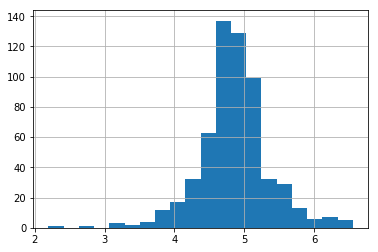

In [61]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.
d
Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

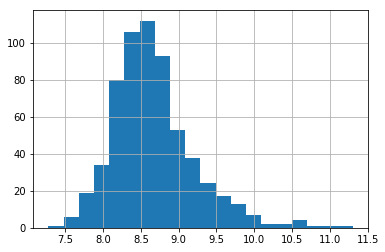

In [62]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

Now we see that the distribution is much better than before. 

### Building a Predictive Model in Python
After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose.

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset. This can be done using the following code:

In [63]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
## df[cat] = le.fit_transform(df[cat].astype(str))

In [67]:
from sklearn.preprocessing import LabelEncoder
df[i] = le.fit_transform(df[i].astype(str)) # reconciles the TypeError: '>' not supported between instances of 'float' and 'str'
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

### Logistic Regression
Let’s make our first Logistic Regression model. One way would be to take all the variables into the model but this might result in overfitting. In simple words, taking all variables might result in the model understanding complex relations specific to the data and will not generalize well. 

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

* Applicants having a credit history (remember we observed this in exploration?)
* Applicants with higher applicant and co-applicant incomes
* Applicants with higher education level
* Properties in urban areas with high growth perspectives

Let’s make our first model with ‘Credit_History’

In [69]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [70]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now for the next exercises:

* Feature Engineering: derive new information and try to predict those
* Better modeling techniques: Let’s explore this next.
